In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# there is no object type data in the datset so no need to use encoding

In [5]:
df.shape

(200, 5)

# EDA AND VISAULIZATION

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

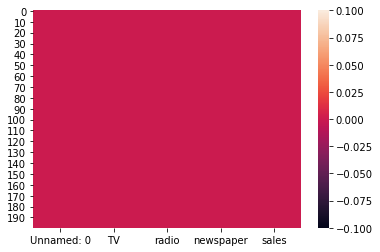

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df=df[['TV', 'radio', 'newspaper', 'sales']]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


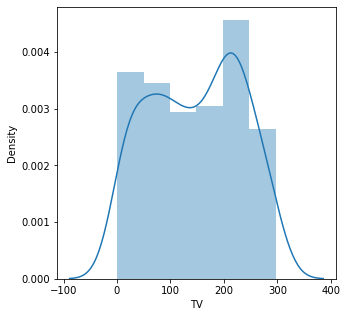

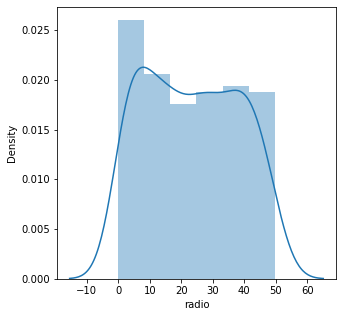

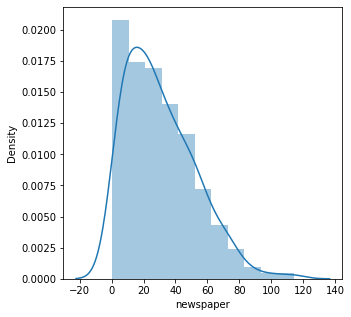

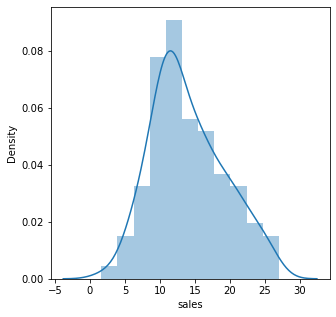

In [10]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])

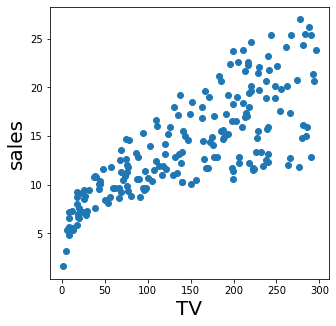

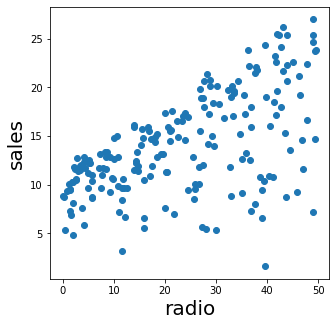

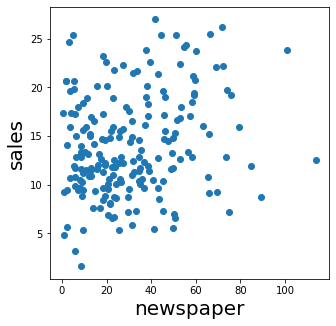

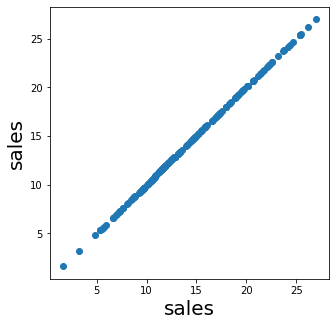

In [11]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    plt.scatter(df[i],df['sales'])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('sales',fontsize=20)

# from above we can conclude that :-
    
# tv ads have a highes positive impact on sales

# radio has quite positive response on sales

# newspaper is not showing any good relation to sales where the points are all scattered 

<AxesSubplot:>

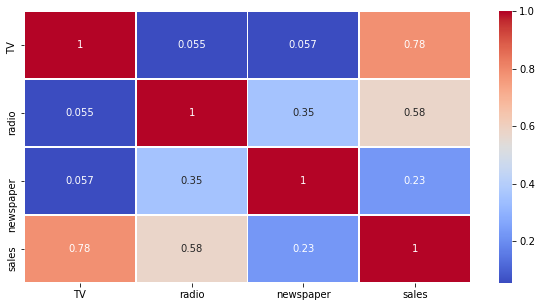

In [12]:
corr=df.corr()
plt.figure(figsize=[10,5])
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)

newspaper is showing very less correlation

# Checking outliers

TV              AxesSubplot(0.125,0.536818;0.110714x0.343182)
radio        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
newspaper    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
sales        AxesSubplot(0.523571,0.536818;0.110714x0.343182)
dtype: object

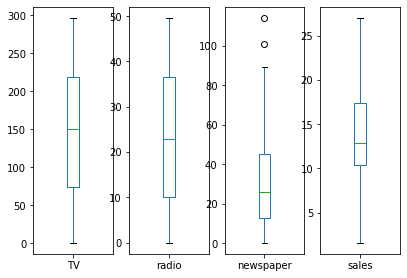

In [13]:
df.plot(kind='box',subplots=True,figsize=(10,10),layout=(2,6))

In [14]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [15]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [16]:
df1=df[(z<3).all(axis=1)]
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
df=df1

In [18]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# checking and removing skewness 

In [19]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform

In [21]:
x=df.iloc[:,0:-1]
y=df['sales']

In [22]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [24]:
x=power_transform(x,method=('yeo-johnson'))
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# feature scaling

In [25]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# building models

In [26]:
lr=LinearRegression()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.9046797524787555

In [27]:
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [28]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
score 0.9660557038127481
r2 0.9839574270870001
diff 0.01790172327425199


LinearRegression()
score 0.8909360390556345
r2 0.9037853658665029
diff 0.012849326810868478


Ridge()
score 0.8909268959561434
r2 0.9028947799124031
diff 0.011967883956259695


SGDRegressor()
score 0.8913486522263906
r2 0.903211621422335
diff 0.011862969195944428


SVR()
score 0.8910846061853224
r2 0.9280770868021614
diff 0.03699248061683902


AdaBoostRegressor()
score 0.9322257445197483
r2 0.9620548713823762
diff 0.029829126862627953


KNeighborsRegressor()
score 0.9059876465484008
r2 0.9292470255981065
diff 0.023259379049705653


RandomForestRegressor()
score 0.965679798326137
r2 0.9860363030037126
diff 0.02035650467757555


BaggingRegressor()
score 0.9595335593696678
r2 0.9853093857265578
diff 0.02577582635689002


DecisionTreeRegressor()
score 0.9263939823262589
r2 0.9703020672415764
diff 0.0439080849153175




# from the above top 3 models are :-

# 1)GradientBoostingRegressor

# 2)RandomForestRegressor

# 3)BaggingRegressor

now will check with hyper tuning the models

# hypertuning

In [39]:
parameters={'n_estimators':[10,100,500],'criterion':['mse','mae'],'max_depth':list(range(3,11))}
clf=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 500}

In [35]:
gb=GradientBoostingRegressor(n_estimators=500,max_depth=3,criterion='mse')
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('r2 score :',r2_score(y_test,pred))

r2 score : 0.9856374720741438


random forest

In [30]:
parameters={'n_estimators':[10,100,500],'criterion':['mse','mae'],'max_depth':list(range(3,11))}
clf=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae', 'max_depth': 9, 'n_estimators': 500}

In [38]:
rfr=RandomForestRegressor(n_estimators=500,max_depth=9,criterion='mae')
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('r2 score :',r2_score(y_test,pred))

r2 score : 0.9862797883814912


# from the above models and differences in cv score, r2 and hyper tuning we choose random forest regressor

In [41]:
df1=pd.DataFrame()
df1['Actual']=y_test
df1['predicted']=pred
df1

,Actual,predicted
66,9.5,8.6024
116,12.2,13.1218
17,24.4,23.8686
143,10.4,10.5863
158,7.3,6.1502
128,24.7,23.5727
142,20.1,19.4975
31,11.9,12.6501
19,14.6,15.2906
169,15.0,14.4264


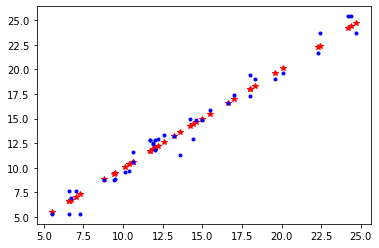

In [43]:
plt.plot(df1['Actual'],y_test,'r*')
plt.plot(df1['Actual'],y_pred,'b.')

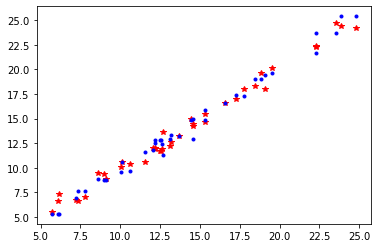

In [44]:

plt.plot(df1['predicted'],y_test,'r*')
plt.plot(df1['predicted'],y_pred,'b.')

# it looks very similar to each other the actual and predicted data

# Saving the model

In [46]:
joblib.dump(rfr,'adverting.obj')

['adverting.obj']